In [2]:
# Common imports
import os
import numpy as np

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
# TensorFlow imports
# may differs from version to versions

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [4]:
# import os
# os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle"
# /content/drive/MyDrive/Kaggle is the path where kaggle.json is present in the Google Drive
#changing the working directory
%cd /content/drive/MyDrive/kaggle
#Check the present working directory using pwd command

/content/drive/MyDrive/kaggle


In [5]:
# Download dataset '140k-real-and-fake-faces' from Kaggle.com
#
# !kaggle datasets download -d xhlulu/140k-real-and-fake-faces
#
# once downloaded code is commented out.

In [ ]:
# unzipping the zip files
# !unzip \*.zip
# once unzipped file,  code is commented out.

Streaming output truncated to the last 5000 lines.
  inflating: real_vs_fake/real-vs-fake/valid/real/34832.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34836.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34839.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34847.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34848.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34852.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34861.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34864.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34868.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34877.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34883.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34887.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34891.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34894.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34904.jpg  
  inflating: real_v

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/kaggle/real_vs_fake/real-vs-fake/train',
target_size=(150, 150),batch_size=20,class_mode='binary')

Found 100000 images belonging to 2 classes.


In [9]:
validation_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/kaggle/real_vs_fake/real-vs-fake/valid',
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 20000 images belonging to 2 classes.


In [10]:
image_folder = os.path.join('/content/drive/MyDrive/kaggle/real_vs_fake/real-vs-fake/', 'train')
img_height, img_width = 150, 150  # size of images
num_classes = 2 

In [11]:
dataset = keras.preprocessing.image_dataset_from_directory(
    image_folder,
    seed=42,
    image_size=(img_height, img_width),
    label_mode='categorical',
    shuffle=True)


Found 100000 files belonging to 2 classes.


In [12]:
class_names = dataset.class_names
class_names

['fake', 'real']

In [13]:
# Helper function to get classname of the image
def get_classname(class_names, real):
    '''
    Returns an element of the array 'class_names' with the index
    where the maximum value from the 'mask' array is located.
    Used to get classname with categorical labels.

    Parameters:
        class_names (array-like): Target array
        mask (array-like): Mask array, elements must be numbers
    Returns:
        One of the element from 'class_names'

    >>> get_classname(['first', 'second'], [0, 1])
    'second'
    >>> get_classname(['first', 'second', third], [1, 0, 0])
    'first'
    '''

    assert len(class_names) == len(
        real), "The arrays must be of the same length"

    return class_names[np.array(real).argmax(axis=0)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


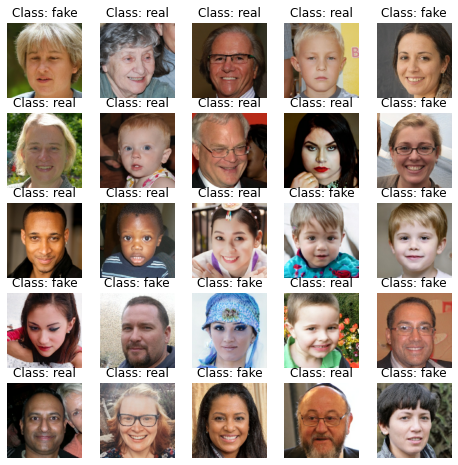

In [16]:
sqrt_img = 5  # images per row / col.
# The square root of the total number of images shown

plt.figure(figsize=(8, 8))
for images, labels in dataset.take(3):
    for index in range(sqrt_img**2):
        # grid 'sqrt_img' x 'sqrt_img'
        plt.subplot(sqrt_img, sqrt_img, index + 1)
        plt.imshow(images[index] / 255)
        class_name = get_classname(class_names, labels[index])
        plt.title("Class: {}".format(class_name))
        plt.axis("off")

In [17]:
batch_size = 16 

In [18]:
# Create data generator based on ImageDataGenerator object

train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=(0.7, 1),
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    image_folder,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 100000 images belonging to 2 classes.


(-0.5, 149.5, 149.5, -0.5)

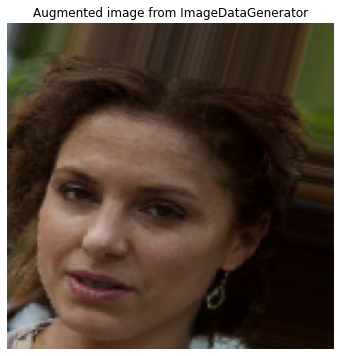

In [19]:
# To see next augmented image
image, label = train_generator.next()

plt.figure(figsize=(6, 6))
plt.imshow(image[0] / 255)  # first image from batch
plt.title("Augmented image from ImageDataGenerator")
plt.axis("off")

In [20]:
n = 10

aug_image_folder = os.path.join('datasets', 'face_dataset_train_aug_images')
if not os.path.exists(aug_image_folder):
    os.makedirs(aug_image_folder)  # create folder if doesn't exist

# Note that the content of the folder is not deleted and files are added at every step

In [ ]:
train_generator.save_to_dir = aug_image_folder
train_generator.save_format = 'jpg'

# If 'save_to_dir' is set, `next()` method
# will generate `batch_size` images each time 
# and save them to 'save_to_dir' folder

for i in range(n):
    print("Step {} of {}".format(i+1, n))
    train_generator.next()
    print("\tGenerate {} random images".format(train_generator.batch_size))

print("\nTotal number images generated = {}".format(n*train_generator.batch_size))

Step 1 of 10
	Generate 16 random images
Step 2 of 10
	Generate 16 random images
Step 3 of 10
	Generate 16 random images
Step 4 of 10
	Generate 16 random images
Step 5 of 10
	Generate 16 random images
Step 6 of 10
	Generate 16 random images
Step 7 of 10
	Generate 16 random images
Step 8 of 10
	Generate 16 random images
Step 9 of 10
	Generate 16 random images
Step 10 of 10
	Generate 16 random images

Total number images generated = 160


In [21]:
n = 5

aug_image_folder = os.path.join('datasets', 'face_dataset_train_aug_images')
if not os.path.exists(aug_image_folder):
    os.makedirs(aug_image_folder)  # create folder if doesn't exist

# Note that the content of the folder is not deleted and files are added at every step

In [22]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=(0.7, 1),
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest')

In [23]:
# TensorFlow imports
# may differs from version to versions

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.preprocessing import image

In [24]:
# Dataset information

# Test dataset is set explicitly, because the amount of data is very small
train_image_folder = os.path.join('/content/drive/MyDrive/kaggle/real_vs_fake/real-vs-fake/', 'train')
test_image_folder =  os.path.join('/content/drive/MyDrive/kaggle/real_vs_fake/real-vs-fake/', 'test')
img_height, img_width = 150, 150  # size of images
num_classes = 2  # real - fake

# Training settings
validation_ratio = 0.15             # 15% for the validation
batch_size = 16

AUTOTUNE = tf.data.experimental.AUTOTUNE

In [25]:
# Train and validation sets
train_ds = keras.preprocessing.image_dataset_from_directory(
    train_image_folder,
    validation_split=validation_ratio,
    subset="training",
    seed=42,
    image_size=(img_height, img_width),
    label_mode='categorical',
    batch_size=batch_size,
    shuffle=True)

val_ds = keras.preprocessing.image_dataset_from_directory(
    train_image_folder,
    validation_split=validation_ratio,
    subset="validation",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical',
    shuffle=True)

Found 100000 files belonging to 2 classes.
Using 85000 files for training.
Found 100000 files belonging to 2 classes.
Using 15000 files for validation.


In [26]:
# Test set
test_ds = keras.preprocessing.image_dataset_from_directory(
    test_image_folder,
    image_size=(img_height, img_width),
    label_mode='categorical',
    shuffle=False)

Found 20005 files belonging to 2 classes.


In [27]:
base_model = keras.applications.ResNet50(weights='imagenet',
                                         include_top=False,  # without dense part of the network
                                         input_shape=(img_height, img_width, 3))

94781440/94765736 [==============================] - 2s 0us/step


In [28]:
# Set layers to non-trainable
for layer in base_model.layers:
    layer.trainable = False

In [29]:
# Add custom layers on top of ResNet
global_avg_pooling = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(num_classes, activation='sigmoid')(global_avg_pooling)

face_classifier = keras.models.Model(inputs=base_model.input,
                                     outputs=output,
                                     name='ResNet50')
face_classifier.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [30]:
# ModelCheckpoint to save model in case of interrupting the learning process
checkpoint = ModelCheckpoint("models/face_classifier.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only=True,
                             verbose=1)

# EarlyStopping to find best model with a large number of epochs
earlystop = EarlyStopping(monitor='val_loss',
                          restore_best_weights=True,
                          patience=3,  # number of epochs with no improvement after which training will be stopped
                          verbose=1)

callbacks = [earlystop, checkpoint]

In [31]:
face_classifier.compile(loss='categorical_crossentropy',
                        optimizer=keras.optimizers.Adam(learning_rate=0.20),
                        metrics=['accuracy'])
epochs = 5

In [ ]:
# This Code Cell executed in 2-3 Hours so it is not executed everytime.
# Output result is saved in models/face_classifier.h5
#
history = face_classifier.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=val_ds)

face_classifier.save("models/face_classifier.h5")

Epoch 1/5
5313/5313 [==============================] - 6854s 1s/step - loss: 23.9276 - accuracy: 0.7393 - val_loss: 34.9965 - val_accuracy: 0.7557

Epoch 00001: val_loss improved from inf to 34.99647, saving model to models/face_classifier.h5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/5
5313/5313 [==============================] - 6765s 1s/step - loss: 26.4887 - accuracy: 0.7683 - val_loss: 32.2098 - val_accuracy: 0.7653

Epoch 00002: val_loss improved from 34.99647 to 32.20982, saving model to models/face_classifier.h5
Epoch 3/5
5313/5313 [==============================] - 6613s 1s/step - loss: 26.0138 - accuracy: 0.7765 - val_loss: 33.5222 - val_accuracy: 0.7659

Epoch 00003: val_loss did not improve from 32.20982
Epoch 4/5
5313/5313 [==============================] - 6645s 1s/step - loss: 26.2287 - accuracy: 0.7772 - val_loss: 35.5618 - val_accuracy: 0.7509

Epoch 00004: val_loss did not improve from 32.20982
Epoch 5/5
5313/5313 [==============================] - 6640s 1s/step - loss: 27.0302 - accuracy: 0.7781 - val_loss: 21.9324 - val_accuracy: 0.7901

Epoch 00005: val_loss improved from 32.20982 to 21.93244, saving model to models/face_classifier.h5


In [32]:
def test_image_classifier_with_folder(model, path, y_true, img_height=150, img_width=150, class_names=['real', 'fake']):
    '''
    Read all images from 'path' using tensorflow.keras.preprocessing.image module, 
    than classifies them using 'model' and compare result with 'y_true'.
    Calculate total accuracy based on 'path' test set.

    Parameters:
        model : Image classifier
        path (str): Path to the folder with images you want to test classifier on 
        y_true : True label of the images in the folder. Must be in 'class_names' list
        img_height (int): The height of the image that the classifier can process 
        img_width (int): The width of the image that the classifier can process
        class_names (array-like): List of class names 

    Returns:
        None
    '''
    num_classes = len(class_names)     # Number of classes
    total = 0                          # number of images total
    correct = 0                        # number of images classified correctly

    for filename in os.listdir(path):
    # read each image in the folder and classifies it
        test_path = os.path.join(path, filename)
        test_image = image.load_img(
            test_path, target_size=(img_height, img_width, 3))
    # from image to array, can try type(test_image)
        test_image = image.img_to_array(test_image)
    # shape from (250, 250, 3) to (1, 250, 250, 3)
        test_image = np.expand_dims(test_image, axis=0)
        result = model.predict(test_image)

        y_pred = class_names[np.array(result[0]).argmax(
            axis=0)]                     # predicted class
        iscorrect = 'correct' if y_pred == y_true else 'incorrect'
        print('{} - {}'.format(iscorrect, filename))
        for index in range(num_classes):
            print("\t{:6} with probabily of {:.2f}%".format(
                class_names[index], result[0][index] * 100))

        total += 1
        if y_pred == y_true:
            correct += 1

    print("\nTotal accuracy is {:.2f}% = {}/{} samples classified correctly".format(
        correct/total*100, correct, total))

In [33]:
model_name = 'face_classifier.h5'
face_classifier = keras.models.load_model(f'models/{model_name}')

In [ ]:
test_image_classifier_with_folder(face_classifier,
                                  '/content/drive/MyDrive/kaggle/real_vs_fake/real-vs-fake/test/real',
                                  y_true='real')

Streaming output truncated to the last 5000 lines.
incorrect - 08854.jpg
	real   with probabily of 0.00%
	fake   with probabily of 100.00%
incorrect - 08299.jpg
	real   with probabily of 0.00%
	fake   with probabily of 100.00%
incorrect - 09131.jpg
	real   with probabily of 0.00%
	fake   with probabily of 100.00%
incorrect - 08350.jpg
	real   with probabily of 0.00%
	fake   with probabily of 100.00%
incorrect - 09148.jpg
	real   with probabily of 0.00%
	fake   with probabily of 100.00%
incorrect - 10517.jpg
	real   with probabily of 0.00%
	fake   with probabily of 100.00%
incorrect - 10235.jpg
	real   with probabily of 0.00%
	fake   with probabily of 100.00%
correct - 10822.jpg
	real   with probabily of 100.00%
	fake   with probabily of 0.00%
incorrect - 09821.jpg
	real   with probabily of 0.00%
	fake   with probabily of 100.00%
incorrect - 07983.jpg
	real   with probabily of 0.00%
	fake   with probabily of 100.00%
incorrect - 09320.jpg
	real   with probabily of 0.00%
	fake   with prob

In [ ]:
test_image_classifier_with_folder(face_classifier,
                                  '/content/drive/MyDrive/kaggle/real_vs_fake/real-vs-fake/test/fake',
                                  y_true='fake')

Streaming output truncated to the last 5000 lines.
incorrect - 4L0S4TUT5W.jpg
	real   with probabily of 100.00%
	fake   with probabily of 0.00%
correct - 4LEDSZW8HP.jpg
	real   with probabily of 0.00%
	fake   with probabily of 100.00%
incorrect - 4L1C7KCUGP.jpg
	real   with probabily of 100.00%
	fake   with probabily of 0.00%
incorrect - 4JQCRV2SN5.jpg
	real   with probabily of 100.00%
	fake   with probabily of 0.00%
correct - 4IUG6NFWDR.jpg
	real   with probabily of 0.00%
	fake   with probabily of 100.00%
incorrect - 4KG9YNOKK3.jpg
	real   with probabily of 100.00%
	fake   with probabily of 0.00%
incorrect - 4J301DEGVY.jpg
	real   with probabily of 100.00%
	fake   with probabily of 0.00%
correct - 4KJ7Z1IJ2N.jpg
	real   with probabily of 0.00%
	fake   with probabily of 100.00%
incorrect - 4L2D0NODFV.jpg
	real   with probabily of 100.00%
	fake   with probabily of 0.00%
incorrect - 4IDXJLLSN8.jpg
	real   with probabily of 100.00%
	fake   with probabily of 0.00%
incorrect - 4JA78EN14G.jp

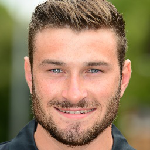

In [36]:
test_path = '/content/drive/MyDrive/kaggle/real_vs_fake/real-vs-fake/test/real/69929.jpg'
test_image = image.load_img(test_path, target_size=(img_height, img_width, 3))
test_image

In [37]:
test_image = image.img_to_array(test_image)  # from image to array
# shape from (250, 250, 3) to (1, 250, 250, 3)
test_image = np.expand_dims(test_image, axis=0)
result = face_classifier.predict(test_image)

for index in range(num_classes):
    print("{:6} with probabily of {:.2f}%".format(
        class_names[index], result[0][index] * 100))

fake   with probabily of 0.00%
real   with probabily of 100.00%


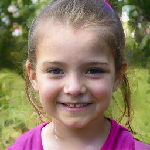

In [38]:
test_path = '/content/drive/MyDrive/kaggle/real_vs_fake/real-vs-fake/test/fake/ZWEJOHNX2Z.jpg'
test_image = image.load_img(test_path, target_size=(img_height, img_width, 3))
test_image

In [39]:
test_image = image.img_to_array(test_image)  # from image to array
# shape from (250, 250, 3) to (1, 250, 250, 3)
test_image = np.expand_dims(test_image, axis=0)
result = face_classifier.predict(test_image)

for index in range(num_classes):
    print("{:6} with probabily of {:.2f}%".format(
        class_names[index], result[0][index] * 100))

fake   with probabily of 100.00%
real   with probabily of 0.00%


In [ ]:
#       ***************** END_OF_PROJECT ********************